In [13]:
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt



In [16]:
df = pd.read_csv('/PNJ.csv')
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
grouped = df.groupby(df['Date/Time'].dt.date)
dfs = [group for _, group in grouped]
df_day = pd.DataFrame()

for df1 in dfs:
    data = {
        'Open': df1['Open'].iloc[0],
        'Close': df1['Close'].iloc[-1],
        'Volume': df1['Volume'].sum(),
        'High': df1['High'].max(),
        'Low': df1['Low'].min(),
        'Date/Time': df1['Date/Time'].iloc[0]
    }
    df2 = pd.DataFrame(data, index=[0])
    df_day = pd.concat([df_day, df2])
df_day['Date/Time'] = pd.to_datetime(df_day['Date/Time'])
df_day['Date/Time'] = df_day['Date/Time'].dt.date
df_day.index = df_day['Date/Time']
df = df_day.copy()
df

,Open,Close,Volume,High,Low,Date/Time
Date/Time,,,,,,
2018-02-28,78.14,78.71,8158,80.61,78.09,2018-02-28
2018-03-01,78.14,77.66,20511,80.32,77.66,2018-03-01
2018-03-02,77.14,77.33,37274,77.90,76.86,2018-03-02
2018-03-05,77.14,78.28,27737,80.50,77.14,2018-03-05
2018-03-06,78.61,81.45,41077,83.13,77.43,2018-03-06
...,...,...,...,...,...,...
2020-12-16,77.20,77.60,636190,77.60,77.00,2020-12-16
2020-12-17,76.50,75.80,1289500,77.40,75.00,2020-12-17
2020-12-18,75.80,77.30,582740,77.50,75.80,2020-12-18


In [18]:
df['SMA_10'] = ta.SMA(df['Close'],10)
df.dropna()

,Open,Close,Volume,High,Low,Date/Time,SMA_10
Date/Time,,,,,,,
2018-03-13,81.64,81.12,18272,83.22,80.46,2018-03-13,80.177
2018-03-14,83.66,81.64,17645,84.43,81.50,2018-03-14,80.470
2018-03-15,81.69,81.45,12195,83.95,81.26,2018-03-15,80.849
2018-03-16,81.69,85.24,54755,86.61,81.59,2018-03-16,81.640
2018-03-19,86.19,86.38,32232,88.93,85.24,2018-03-19,82.450
...,...,...,...,...,...,...,...
2020-12-16,77.20,77.60,636190,77.60,77.00,2020-12-16,77.231
2020-12-17,76.50,75.80,1289500,77.40,75.00,2020-12-17,77.120
2020-12-18,75.80,77.30,582740,77.50,75.80,2020-12-18,77.060


In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df.index, df['Close'])

ax.xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.gcf().autofmt_xdate()

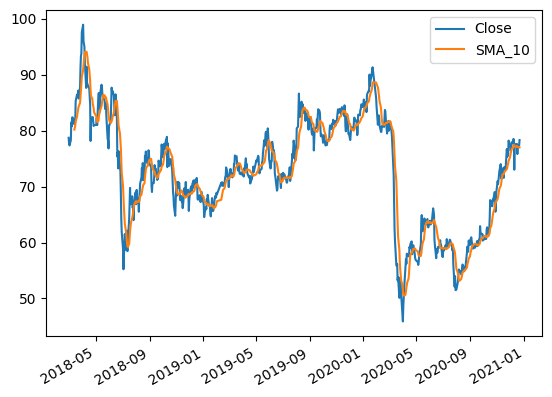

In [27]:
plt.plot(df['Close'])
plt.plot(df['SMA_10'])
ax.xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend(['Close','SMA_10'])
plt.gcf().autofmt_xdate()

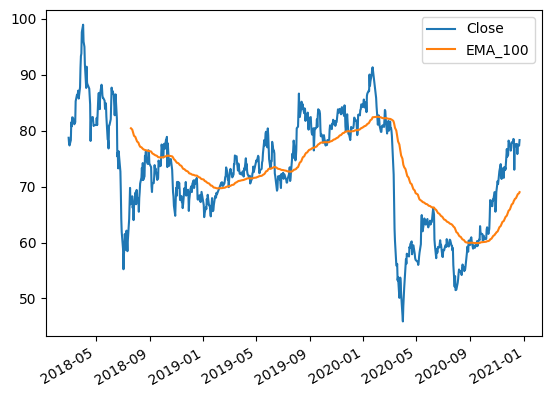

In [28]:
df['EMA_100'] = ta.EMA(df['Close'],100)

plt.plot(df['Close'])
plt.plot(df['EMA_100'])
ax.xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend(['Close','EMA_100'])
plt.gcf().autofmt_xdate()

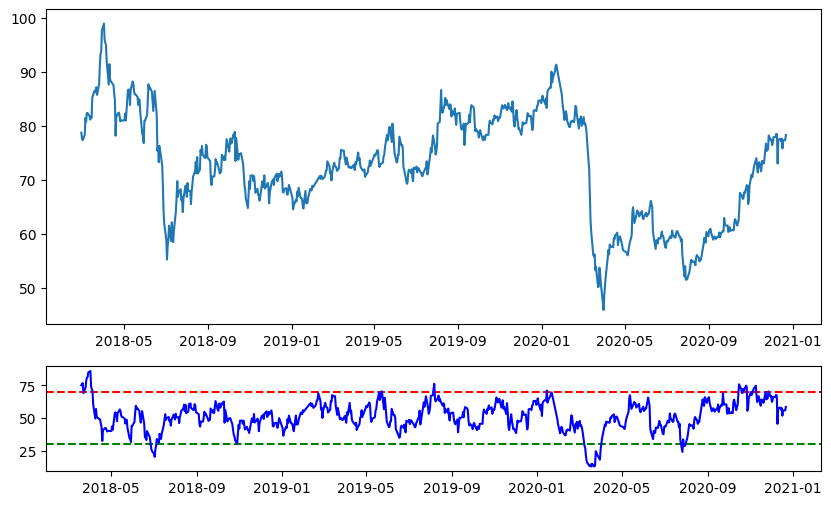

In [30]:
df['RSI'] = ta.RSI(df['Close'])

fig, axs = plt.subplots(2,1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10,6))

axs[0].plot(df['Close'])
axs[1].axhline(y=70, color = 'r', linestyle="--")
axs[1].axhline(y=30, color = 'g', linestyle="--")
axs[1].plot(df['RSI'], color = 'blue')

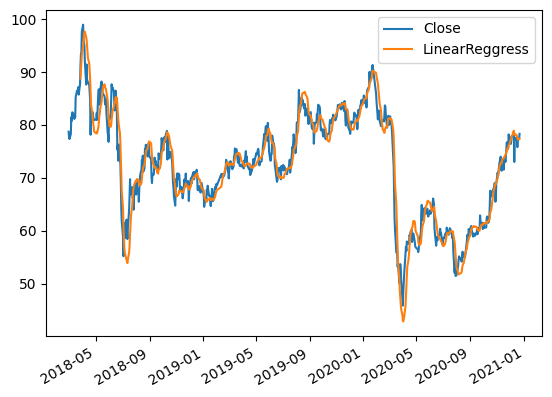

In [31]:
df['LinearReggress'] = ta.LINEARREG(df['Close'],20)
plt.plot(df['Close'])
plt.plot(df['LinearReggress'])
ax.xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend(['Close','LinearReggress'])
plt.gcf().autofmt_xdate()

<BarContainer object of 709 artists>

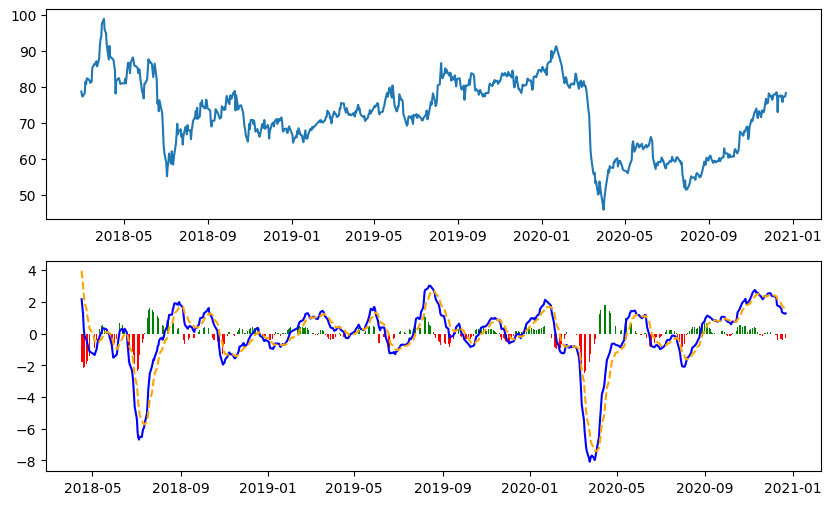

In [33]:
macd, macd_signal, macd_hist  = ta.MACD(df['Close'])

df['RSI'] = ta.RSI(df['Close'])

fig, axs = plt.subplots(2,1, gridspec_kw={"height_ratios":[3,3]}, figsize=(10,6))

c = ['red' if cl < 0 else "green" for cl in macd_hist]

axs[0].plot(df['Close'])
axs[1].plot(macd, 'b-')
axs[1].plot(macd_signal, '--', color='orange')
axs[1].bar(macd_hist.index,macd_hist, color = c)


In [49]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df_d=df[df['Date/Time'].dt.year>=2020]

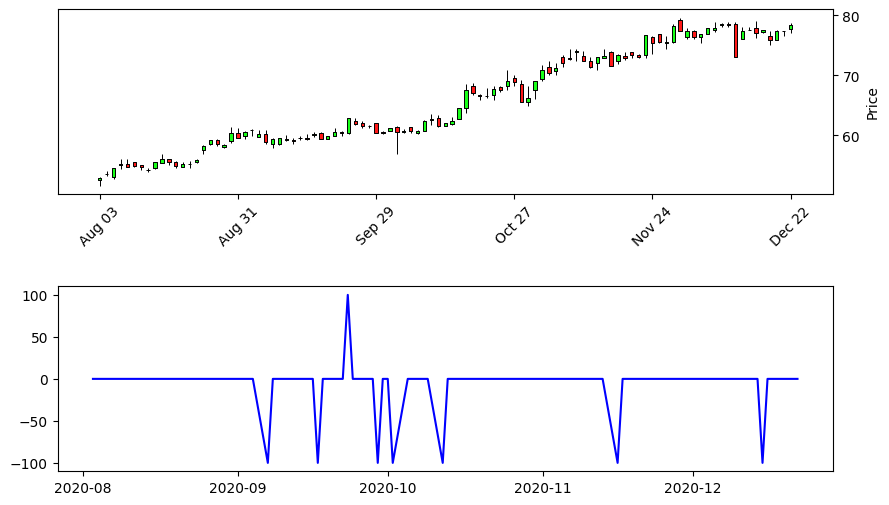

In [57]:
import mplfinance as mpf
fig, axs = plt.subplots(2,1, gridspec_kw={"height_ratios":[3,3]}, figsize=(10,6))

plt.subplots_adjust(hspace = 0.5)


df['EngulFing']= ta.CDLENGULFING(df['Open'],df['High'],df['Low'],df['Close'])
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df_d=df[(df['Date/Time'].dt.year>=2020)&(df['Date/Time'].dt.month>=8)]
df_d.index = pd.DatetimeIndex(df_d['Date/Time'])


colors = mpf.make_marketcolors(up="#00ff00",down="#ff0000")
mpf_style = mpf.make_mpf_style(base_mpf_style="yahoo", marketcolors=colors)

mpf.plot(df_d, type='candle', ax=axs[0],style = mpf_style)
axs[1].plot(df_d['EngulFing'], color = "blue")

